<a href="https://colab.research.google.com/github/bhuvaneshkj/cloud-custodian/blob/master/CapstoneResourcePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install --upgrade git+https://github.com/jroakes/google-analytics.git
  !pip install fbprophet
except:
  pass
finally:
  clear_output()
  print('All Loaded')

All Loaded


In [2]:
import pandas as pd
import datetime

In [7]:
from fbprophet import Prophet
import seaborn as sns


In [59]:
df=  pd.read_csv('/content/ProcessedData.csv')
df.head()

,Time,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,2013-06-30 22:03:24,1372629804,2,5851.9989,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
1,2013-06-30 22:08:24,1372630104,2,5851.9989,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
2,2013-06-30 22:13:24,1372630404,2,5851.9989,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
3,2013-06-30 22:18:24,1372630704,2,5851.9989,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000
4,2013-06-30 22:23:24,1372631004,2,5851.9989,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000


In [8]:
sns.lineplot(x="Time", y="CPU usage [%]",
             data=df)

Error in callback <function flush_figures at 0x7fea665ce2f0> (for post_execute):


KeyboardInterrupt: ignored

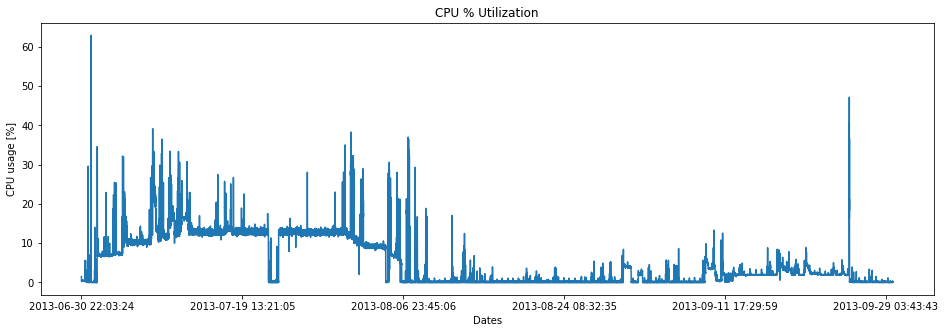

In [24]:
df = df.set_index("Time")
ax = df['CPU usage [%]'].plot(figsize = (16,5), title = "CPU % Utilization")
ax.set(xlabel='Dates', ylabel='CPU usage [%]');

In [29]:
df_pr_index = df.reset_index()
df_pr_index.head()
df_pr_index

,Time,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,2013-06-30 22:03:24,1372629804,2,5851.99890,87.779984,1.500000,8218624.0,1.034593e+06,160.866667,21.733333,0.266667,1.466667
1,2013-06-30 22:08:24,1372630104,2,5851.99890,29.259995,0.500000,8218624.0,4.585755e+05,0.000000,2.333333,0.200000,1.000000
2,2013-06-30 22:13:24,1372630404,2,5851.99890,27.309328,0.466667,8218624.0,1.845480e+05,32.066667,4.200000,0.133333,1.066667
3,2013-06-30 22:18:24,1372630704,2,5851.99890,23.407996,0.400000,8218624.0,7.829227e+04,0.000000,0.866667,0.066667,1.000000
4,2013-06-30 22:23:24,1372631004,2,5851.99890,19.506663,0.333333,8218624.0,1.677720e+05,0.000000,0.200000,0.133333,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
25215,2013-09-29 21:38:50,1380490730,2,5851.99912,3.901333,0.066667,8388608.0,1.677680e+04,0.000000,0.133333,0.000000,0.000000
25216,2013-09-29 21:43:50,1380491030,2,5851.99912,0.000000,0.000000,8388608.0,0.000000e+00,0.000000,0.133333,0.000000,0.000000
25217,2013-09-29 21:48:50,1380491330,2,5851.99912,15.605331,0.266667,8388608.0,1.118453e+04,0.000000,1.266667,0.000000,0.066667
25218,2013-09-29 21:53:50,1380491630,2,5851.99912,5.851999,0.100000,8388608.0,5.033040e+04,0.000000,0.466667,0.000000,0.000000


In [57]:
df['cap'] = 8.5
df_pr = df_pr_index[['Time','CPU usage [%]']]

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-20000]
test_data_pr = df_pr.iloc[len(df)-20000:]
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=3,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5218,2013-07-20 07:31:11,12.394609,8.126318,16.128602,12.394609,12.394609,-0.392359,-0.392359,-0.392359,-0.295079,-0.295079,-0.295079,-0.097279,-0.097279,-0.097279,0.0,0.0,0.0,12.002250
5219,2013-07-20 07:36:11,12.393710,8.153677,16.381447,12.393710,12.393710,-0.344031,-0.344031,-0.344031,-0.236076,-0.236076,-0.236076,-0.107955,-0.107955,-0.107955,0.0,0.0,0.0,12.049679
5220,2013-08-01 07:36:11,9.287607,-3.884378,23.862790,-3.231650,23.059537,0.381895,0.381895,0.381895,-0.236076,-0.236076,-0.236076,0.617971,0.617971,0.617971,0.0,0.0,0.0,9.669502
5221,2013-09-01 07:36:11,1.263506,-88.907537,88.064353,-87.097251,90.116706,-2.450860,-2.450860,-2.450860,-0.236076,-0.236076,-0.236076,-2.214784,-2.214784,-2.214784,0.0,0.0,0.0,-1.187354
5222,2013-10-01 07:36:11,-6.501753,-202.688889,194.358458,-201.184135,193.321443,-0.038114,-0.038114,-0.038114,-0.236076,-0.236076,-0.236076,0.197962,0.197962,0.197962,0.0,0.0,0.0,-6.539867


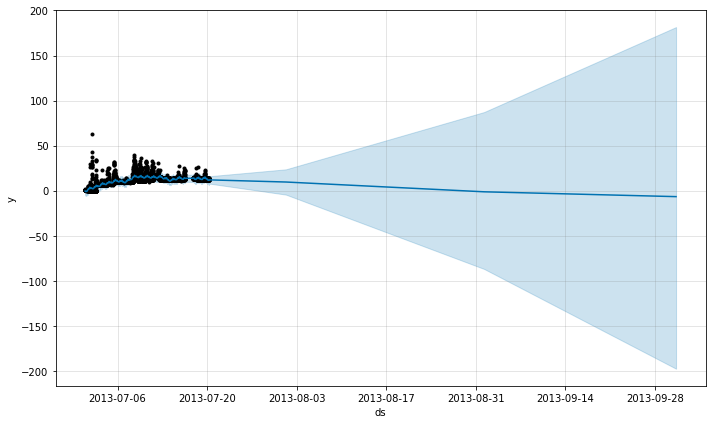

In [50]:
fig1 = m.plot(prophet_pred)

In [51]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, prophet_pred)


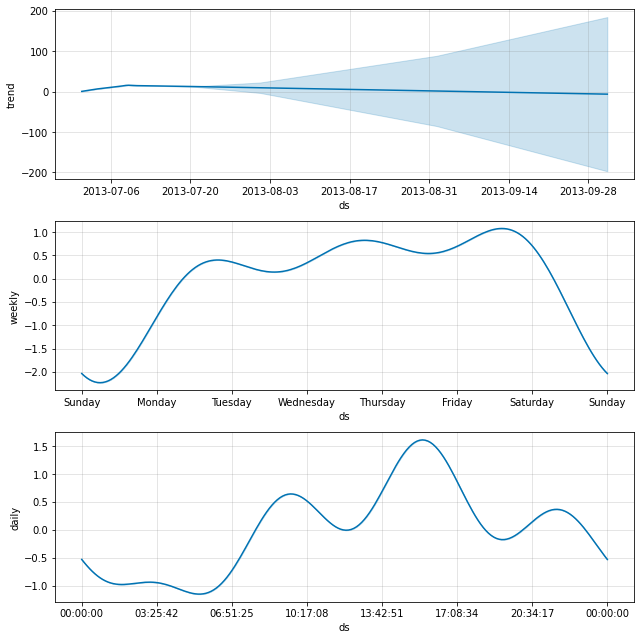

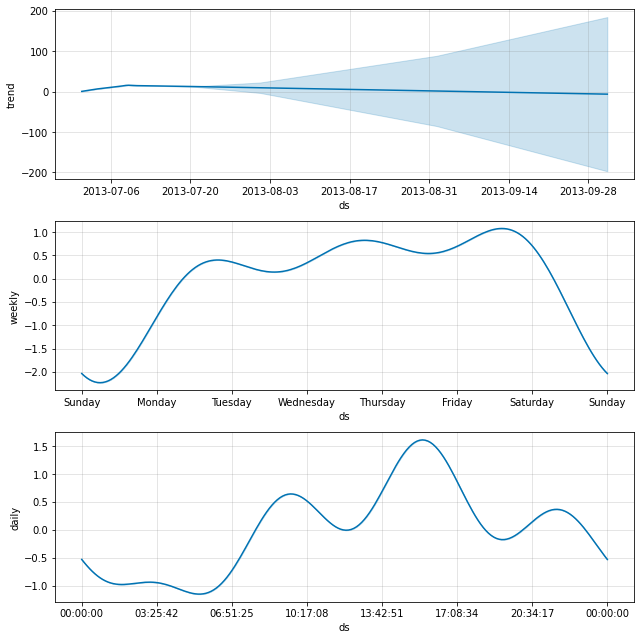

In [54]:
m.plot_components(prophet_pred)

In [58]:
train_data_pr['cap'] = 8.5
m2 = Prophet(growth='logistic')
m2.fit(train_data_pr)
future2 = m2.make_future_dataframe(periods=3,freq='MS')
prophet_pred2 = m2.predict(future2)
prophet_pred2.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ValueError: ignored

In [41]:
train_data_pr

['ds', 'y']